In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_biclusters, make_multilabel_classification

In [3]:
def plot_multi_lables(X, y):
    pd.DataFrame(X).plot(x=0,y=1,kind='scatter', c=y[:,0]+(y[:,1]*2), cmap='cool')
    plt.show()

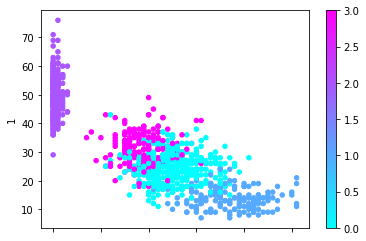

In [4]:
data = make_multilabel_classification(n_samples=1000, n_features=2, n_classes=2, n_labels=1, random_state=14)
plot_multi_lables(data[0],data[1])

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
X = preprocessing.scale(data[0] ,axis=0)  
y = data[1]

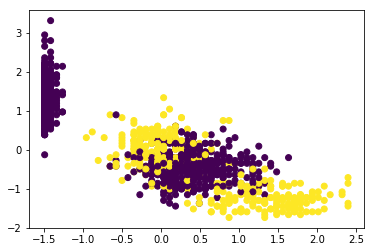

In [7]:
plt.scatter(x = X[:,0], y = X[:,1], c = y[:,0])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
from rgb_nn import RGB_NN

import time

In [10]:
nn = MLPClassifier(hidden_layer_sizes=(3), 
                   activation='logistic', 
                   learning_rate_init=0.01, 
                   max_iter=1, warm_start=True)

In [11]:
rgb = RGB_NN(server_loc='http://192.168.1.153:5000', scale=(-1.5,1.5))
# rgb._dummy_api = False
# rgb._verbose = False
rgb._brightness = 0.15

0.648484848485
0.651515151515
0.651515151515
0.672727272727
0.69696969697
0.660606060606
0.712121212121
0.733333333333
0.751515151515
0.733333333333
0.754545454545
0.754545454545
0.751515151515
0.736363636364
0.739393939394
0.730303030303
0.730303030303
0.736363636364
0.736363636364
0.730303030303


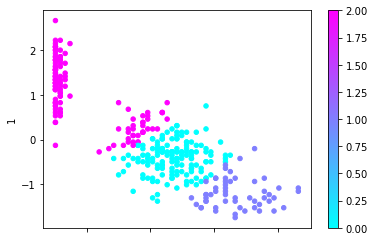

In [16]:
for i in range(20):
    time.sleep(0.2)
    nn.fit(X_train, y_train)
    print(nn.score(X_test, y_test))
    rgb.display_weights(nn)
plot_multi_lables(X_test,nn.predict(X_test))